# Introduction

---
* <b>Aim</b>:
To develop machine learning and deep learning algorithms in order to detect monkeypox skin lesion.

# Requirements

* Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Hardware requirements(optional)

---
Availability of GPU will yield better performance. 

In [2]:
!nvidia-smi

Tue Aug  2 12:51:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* Necessary packages

---
Install and import the necessary packages.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import random as rd
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

* Unzip the dataset

In [4]:
!unzip '/content/drive/MyDrive/MonkeyPox/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_06.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_07.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_08.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_09.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_10.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_11.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_12.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_13.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_00.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_01.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_02.jpg  
  inflating: Augmented Images/Augmen

# Dataset

In [5]:
train = "/content/Fold1/Fold1/Fold1/Train"
val = "/content/Fold1/Fold1/Fold1/Val"
test = "/content/Fold1/Fold1/Fold1/Test"

batchSize = 32
epochSize=32
imgSize = (200, 200)
lblMode = "binary"

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train,image_size=imgSize,label_mode=lblMode,batch_size=batchSize)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test,image_size=imgSize,label_mode=lblMode,batch_size=batchSize)
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val,image_size=imgSize,label_mode=lblMode,batch_size=batchSize,shuffle=False)

Found 2142 files belonging to 2 classes.
Found 45 files belonging to 2 classes.
Found 420 files belonging to 2 classes.


# Model

Build model (Neural Netwrok architecture)

---

In [6]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

inputs = layers.Input(shape=(200, 200, 3), name="input_layer")
base_layer = base_model(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(1, activation="sigmoid")(dense_2)
model = Model(inputs, outputs)

Architecture of the model

---

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, None, None, 1536)  10783535 
                                                                 
 dropout (Dropout)           (None, 6, 6, 1536)        0         
                                                                 
 flatten (Flatten)           (None, 55296)             0         
                                                                 
 dense (Dense)               (None, 256)               14156032  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896 

Training the model

---

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=epochSize,validation_data=val_data)

Epoch 1/32
67/67 [==============================] - 25s 186ms/step - loss: 0.7835 - accuracy: 0.8296 - val_loss: 1.2905 - val_accuracy: 0.7024
Epoch 2/32
67/67 [==============================] - 9s 132ms/step - loss: 0.3053 - accuracy: 0.9239 - val_loss: 1.0603 - val_accuracy: 0.8238
Epoch 3/32
67/67 [==============================] - 9s 133ms/step - loss: 0.2555 - accuracy: 0.9505 - val_loss: 1.2843 - val_accuracy: 0.7929
Epoch 4/32
67/67 [==============================] - 9s 134ms/step - loss: 0.1512 - accuracy: 0.9608 - val_loss: 0.9509 - val_accuracy: 0.7952
Epoch 5/32
67/67 [==============================] - 9s 135ms/step - loss: 0.1438 - accuracy: 0.9683 - val_loss: 1.3933 - val_accuracy: 0.8214
Epoch 6/32
67/67 [==============================] - 9s 134ms/step - loss: 0.1280 - accuracy: 0.9729 - val_loss: 2.1567 - val_accuracy: 0.7738
Epoch 7/32
67/67 [==============================] - 9s 133ms/step - loss: 0.1307 - accuracy: 0.9701 - val_loss: 2.0408 - val_accuracy: 0.7810
Epoch

# Model evaluation

In [9]:
#variables
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

Accuracy

---

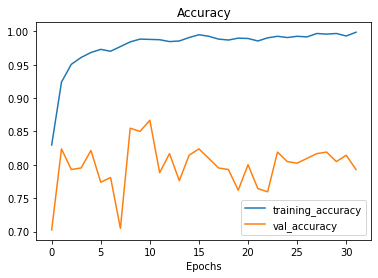

In [10]:
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

Plot loss

---

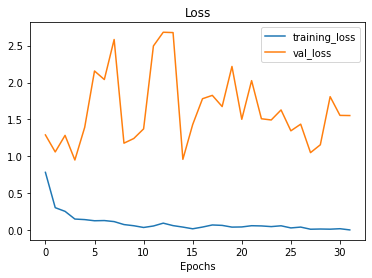

In [11]:
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

Evaluate model with test dataset

---

In [12]:
model.evaluate(test_data)

2/2 [==============================] - 1s 706ms/step - loss: 0.7779 - accuracy: 0.8889


[0.7779091596603394, 0.8888888955116272]

# Enhancement scope

---

* The model can be improvised by altering the architecture of our model
* This will help us to increase the accuracy and decrease the loss